<h2 style="color: red;">Cinemática directa de Robot antropomórfico 3GDL</h2>

Instalar librerías

In [18]:
 %pip install sympy==1.10.1
 %pip install matplotlib
 %pip install numpy
 %pip install mpmath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar librerías en Python


In [19]:
# importamos las librerías necesarias
import sympy as sp  # librería para cálculo simbólico
import threading    # librería para trabajar funciones en paralelo

Crear clase para D-H

In [20]:
# Version 1.0
class InvKin():
    # Version 1.0
    def __init__(self, threads_num):
        """
        Parametros de la clase

        :param threads_num: Numero de subprocesos a ejecutar de forma paralela
        """
        self.threads_num = threads_num
    # Version 1.0
    def matrix_mult(self, init, final, row, col, matrixA, MatrixB, MatrixC):
        """
        Funcion para realizar multiplicacion de matrices por bloques
        :param init: Valor inicial del bloqe
        :param final: Valor final del bloque
        :param row: Numero de filas
        :param col: Numero de columnas
        :param matrixA: Valores de la matriz A
        :param MatrixB: Valores de la matriz B
        :param MatrixC: Matriz Nulo (Resultado)
        :return: NULL
        """
        for i in range(init, final):
            for j in range(col):  # Columnas
                result = 0
                for k in range(row):  # Filas
                    result += matrixA[i,k] * MatrixB[k,j]
                MatrixC[i,j] = result
    # version 1.0
    def start(self, matrix_A, matrix_B, matrix_C):
        """
        :param matrix_A: Conjunto bidimensional de valores de la matriz A
        :param matrix_B: Conjunto bidimensional de valores de la matriz B
        :param matrix_C: Matriz resultado
        :return: Matriz C
        """
        # print(matrix_A[0, 0])
        # print(matrix_B)
        # print(matrix_C)
        # Numero de filas
        size_rows, size_columns = sp.shape(matrix_A)

        # Numero de bloques
        nbloques = size_rows/self.threads_num

        # Lista para almencenar los hilos creados
        threads = list()

        for i in range(self.threads_num):
            # Asignar el punto o indice inicial y final del bloque
            initial = int(i * nbloques)
            if i <= self.threads_num - 2:
                final = int((i+1)*nbloques)
            else:
                final = int(size_rows)

            x = threading.Thread(target=self.matrix_mult, args=(initial, final, size_rows, size_columns, matrix_A, matrix_B, matrix_C)) # Parametros de la instancia
            threads.append(x) # Agregar hilo a la lista
            x.start() # Iniciar hilo

        # Esperar a que terminen todos los hilos
        for index, thread in enumerate(threads):
            thread.join()

        # Restornar la matriz resultado
        return matrix_C
    # Version 2.0
    def symTfromDH(self, theta, d, a, alpha):
        """
        

        Definimos una función para construir las matrices de transformación
        en forma simbolica a partir de los parámetros D-H
        """
        # theta y alpha en radianes
        # d y a en metros
        T = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.cos(alpha), a*sp.cos(theta)],
              [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
              [0, sp.sin(alpha), sp.cos(alpha), d],
              [0, 0, 0, 1]])
        
        return T

Crear instancia de la clase **InvKin**

In [21]:
__instance_matrix = InvKin(threads_num=2)

Definir los valores de los parámetros de las articulaciones del Robot

In [22]:
alpha1 = sp.pi/2
alpha2 = 0
alpha3 = 0

d1 = 0.3
d2 = 0
d3 = 0

a1 = 0
a2 = 0.2
a3 = 0.25

theta1 = sp.pi/2
theta2 = sp.pi/2
theta3 = 0

Calcular la matriz de transformación para la primera articulación

In [23]:
T01 = __instance_matrix.symTfromDH(theta1, d1, a1, alpha1)
T01

Matrix([
[0, 0, 0,   0],
[1, 0, 0,   0],
[0, 1, 0, 0.3],
[0, 0, 0,   1]])

Calcular la matriz de transformación para la segunda articulación

In [24]:
T02 = __instance_matrix.symTfromDH(theta2, d2, a2, alpha2)
T02

Matrix([
[0, -1, 1,   0],
[1,  0, 0, 0.2],
[0,  0, 1,   0],
[0,  0, 0,   1]])

Calcular la matriz de transformación para la tercera articulación

In [25]:
T03 = __instance_matrix.symTfromDH(theta3, d3, a3, alpha3)
T03

Matrix([
[1, 0, 0, 0.25],
[0, 1, 0,    0],
[0, 0, 1,    0],
[0, 0, 0,    1]])

Conocer el número de filas y columnas de la matriz

In [26]:
__rows, __columns = sp.shape(T02)

Matriz nula para guardar el resultado de la multiplicación de **T01** y **T02**

In [27]:
T_aux = sp.Matrix(__rows, __columns, lambda i,j: 0)
T_aux

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Realizar la multiplicación de **T01** y **T02**

In [28]:
T_aux = __instance_matrix.start(matrix_A=T01, matrix_B=T02, matrix_C=T_aux)
T_aux

Matrix([
[0,  0, 0,   0],
[0, -1, 1,   0],
[1,  0, 0, 0.5],
[0,  0, 0,   1]])

Matriz nula para guardar el resultado de la multiplicación de **T_aux** y **T03**

In [29]:
T_result = sp.Matrix(__rows, __columns, lambda i,j: 0)
T_result

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Realizar la multiplicación de **T_aux** y **T03**

In [30]:
T_result = __instance_matrix.start(matrix_A=T_aux, matrix_B=T03, matrix_C=T_result)
T_result

Matrix([
[0,  0, 0,    0],
[0, -1, 1,    0],
[1,  0, 0, 0.75],
[0,  0, 0,    1]])

Mostrar resultado

In [31]:
print("Eje en X:", round(T_result[0,3], 2))
print("Eje en Y:", round(T_result[1,3], 2))
print("Eje en Z:", round(T_result[2,3], 2))

Eje en X: 0
Eje en Y: 0
Eje en Z: 0.75


Importar librerías para graficar en Matplotlib


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d # librería para graficar 3D

Clase para graficar los resultados

In [33]:
class Plot():
    # Version 1.0
    def __init__(self, mtxs):
        """
        Parametros de la clase

        :param mtxs: Matrices de transformacion(Resultado)
        """
        self.mtxs = mtxs
        # LLamar funcion para configurar el entorno donde se visualizará el robot
        self.__config_plt()

    # Version 1.1
    def __config_plt(self):
        """
		Inicializar los parametros para graficar en Matplotlib

        :return: NULL
        """
        # configurar el espacio cartesiano donde se visualizará el robot
        self.fig = plt.figure()
        self.ax = self.fig.gca(projection='3d')

        # Limitar las coordenadas en el eje (x,y,z)
        self.ax.set_xlim(-0.2, 0.6)
        self.ax.set_ylim(-0.2, 0.6)
        self.ax.set_zlim(-0.2, 0.6)

        # Mostrar las etiquetas X, Y y Z
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_zlabel('z')
        self.camera()

    # Version 1.0
    def camera(self, azim=80, dist=10, elev=10):
        """
        Configurar vista del entorno

        :param azim:  Rotacion del entono de la grafica
        :param dist: Distancia para la vista del entono de la grafica
            :param elev: Altura para la vista del entono de la grafica
        :return: NULL
        """
            # Camara de la gráfica

        self.ax.azim = azim
        self.ax.dist = dist
        self.ax.elev = elev

    # Version 1.3
    def update_position(self, e, labels_and_points):
        """
            Funcion que ayuda a actualizar la posicion de las etiquetas al detectar el evento de moviento en la grafica

        :param e: Detectar evento para actualiza la posicion
        :param labels_and_points: Tupla que contiene las etiquetas y Coordenadas
        :return: NULL
        """
        for label, x, y, z in labels_and_points:
            x2, y2, _ = proj3d.proj_transform(x, y, z, self.ax.get_proj())
            label.xy = x2, y2
            label.update_positions(self.fig.canvas.renderer)
        self.fig.canvas.draw()

    # version 2.0
    def __plot_text(self, points, labels, s):
        """
        Funcion para agregar texto en la grafica

        :param points:  Coordenadas de las etiquetas
        :param labels: Mensaje a mostrar
        :param s: Estilo
        :return: NULL
        """
        plotlabels = []
        # Coordenadas de etiquetas
        xs, ys, zs = np.split(points, 3, axis=1)

        # sc = self.ax.scatter(xs,ys,zs)

        for txt, x, y, z in zip(labels, xs, ys, zs):
            # Trasformacion de projeccion con respecto a la vista
            x2, y2, _ = proj3d.proj_transform(x, y, z, self.ax.get_proj())

            # Estilo para mostrar texto
            if s:
                label = plt.annotate(
                    txt, xy=(x2, y2), xytext=(-10, 0),
                    textcoords='offset points', ha='right', va='bottom', fontsize=8, color="black")
            else:
                label = plt.annotate(
                    txt, xy=(x2, y2), xytext=(-20, 20),
                    textcoords='offset points', ha='right', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0'), fontsize=8)
            # Agregar etiquetasa las lista
            plotlabels.append(label)

        # Actualzar posicion de las etiquetas con base a la visualizacion de la grafica
        self.fig.canvas.mpl_connect('motion_notify_event',
                                    lambda event: self.update_position(event, zip(plotlabels, xs, ys, zs)))

    # Version 3.2
    def start(self, theta1, theta2, theta3):
        """
            Mostrar grafica

        :param theta1: Angulo de la primera union
        :param theta2: Angulo de la segunda union
        :param theta3: Angulo de la tercera union
        :return:
        """
        axis = [[0], [0], [0]]
        for j in range(3):
            for i, matx in enumerate(self.mtxs):
                axis[j].extend([matx[j, 3]])
        print(axis)

        self.ax.plot(axis[0], axis[1], axis[2], 'o-', markersize=6, markerfacecolor="red",
                     linewidth=2, color="blue")

        self.ax.plot([axis[0][-1]], [axis[1][-1]], [axis[2][-1]], 'o-', markersize=8, markerfacecolor="white")

        points = np.array([(axis[0][-1], axis[1][-1], axis[2][-1])])
        labels = ['Punto final del robot ({}, {}, {})'.format(round(axis[0][-1], 2), round(axis[1][-1], 2),
                                                              round(axis[2][-1], 2))]
        self.__plot_text(points=points, labels=labels, s=False)

        points = np.array([(axis[0][0], axis[1][0], axis[2][0]), (axis[0][1], axis[1][1], axis[2][1]),
                           (axis[0][2], axis[1][2], axis[2][2])])
        labels = ['$\\theta$={}'.format(theta1), '$\\theta$={}'.format(theta2), '$\\theta$={}'.format(theta3)]
        self.__plot_text(points=points, labels=labels, s=False)

        plt.show()



Mostramos la grafica

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0.300000000000000, 0.500000000000000, 0.750000000000000]]


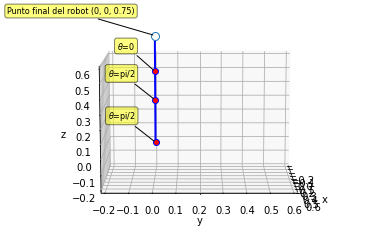

In [34]:
plot1 = Plot([T01, T_aux, T_result])
plot1.camera(0)
plot1.start(theta1, theta2, theta3)

Realizamos el sugundo test con diferentes valores para theta

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0.300000000000000, 0.500000000000000, 0.750000000000000]]


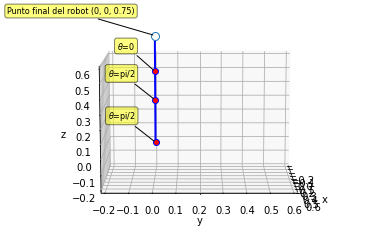

Eje en X: 0
Eje en Y: 0
Eje en Z: 0.75


In [35]:
theta1 = sp.pi/2 # 90
theta2 = sp.pi/2 # 90
theta3 = 0 # 90

T01 = __instance_matrix.symTfromDH(theta1, d1, a1, alpha1)
T02 = __instance_matrix.symTfromDH(theta2, d2, a2, alpha2)
T03 = __instance_matrix.symTfromDH(theta3, d3, a3, alpha3)

T_aux = sp.Matrix(__rows, __columns, lambda i,j: 0)
T_aux = __instance_matrix.start(matrix_A=T01, matrix_B=T02, matrix_C=T_aux)

T_result = sp.Matrix(__rows, __columns, lambda i,j: 0)
T_result = __instance_matrix.start(matrix_A=T_aux, matrix_B=T03, matrix_C=T_result)

plot1 = Plot([T01, T_aux, T_result])
plot1.camera(0)
plot1.start(theta1, theta2, theta3)

t0 = T01*T02*T03
print("Eje en X:", round(t0[0,3], 2))
print("Eje en Y:", round(t0[1,3], 2))
print("Eje en Z:", round(t0[2,3], 2))

# New Section